# Análise de Custos Médicos com Python
### Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
%matplotlib inline

Aqui carregamos todas as bibliotecas necessárias para manipulação de dados, visualização e modelagem.

## Carregando e explorando o dataset

In [2]:
df = pd.read_csv('datasets/insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Carregamos o dataset de despesas médicas e verificamos suas primeiras linhas, tipos de dados, valores nulos e estatísticas descritivas.

## Análise Exploratória

### Distribuição de Idade

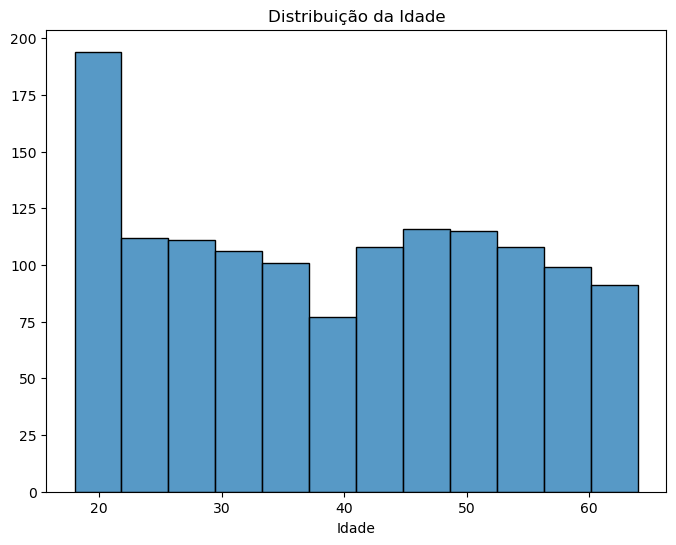

In [7]:
f, ax = plt.subplots(figsize=(8,6))
sns.histplot(df, x='age', ax=ax)
ax.set_title('Distribuição da Idade')
ax.set_ylabel('')
ax.set_xlabel('Idade')
plt.show()

Visualizamos a distribuição da idade dos segurados.

## Idade por Fumantes e Não Fumantes

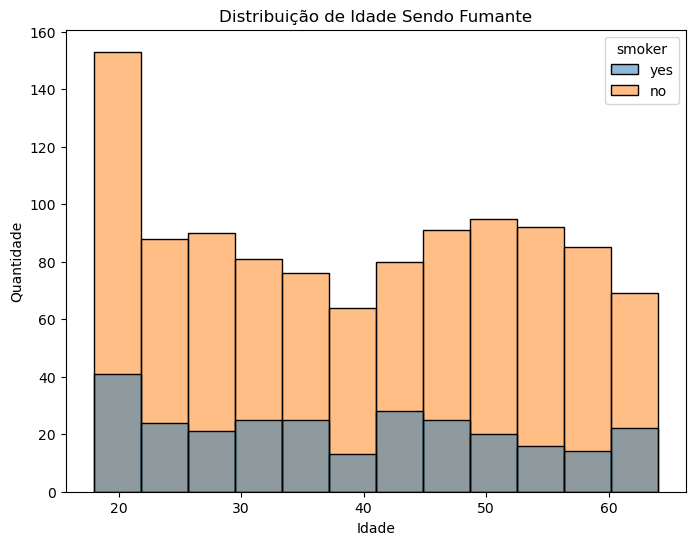

In [8]:
f, ax = plt.subplots(figsize=(8,6))
sns.histplot(df, x='age', hue='smoker', ax=ax)
ax.set_xlabel('Idade')
ax.set_ylabel('Quantidade')
ax.set_title('Distribuição de Idade Sendo Fumante')
plt.show()

Comparação da idade entre fumantes e não fumantes

## Distribuição do IMC

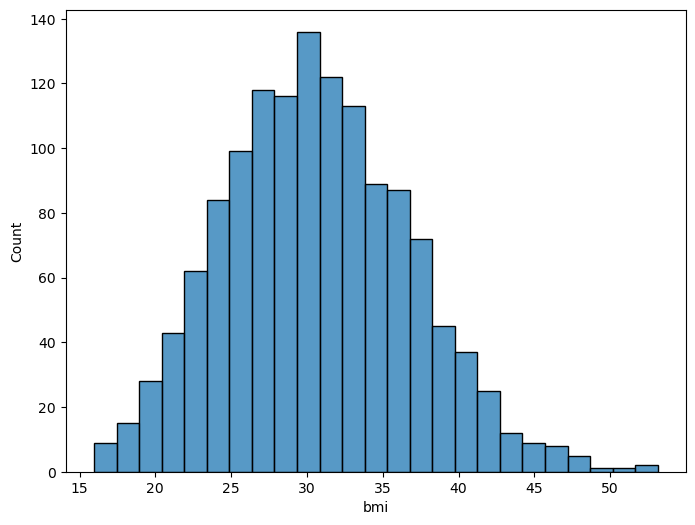

In [9]:
f, ax = plt.subplots(figsize=(8,6))
sns.histplot(df, x='bmi', ax=ax)
plt.show()

## Relação Idade x IMC

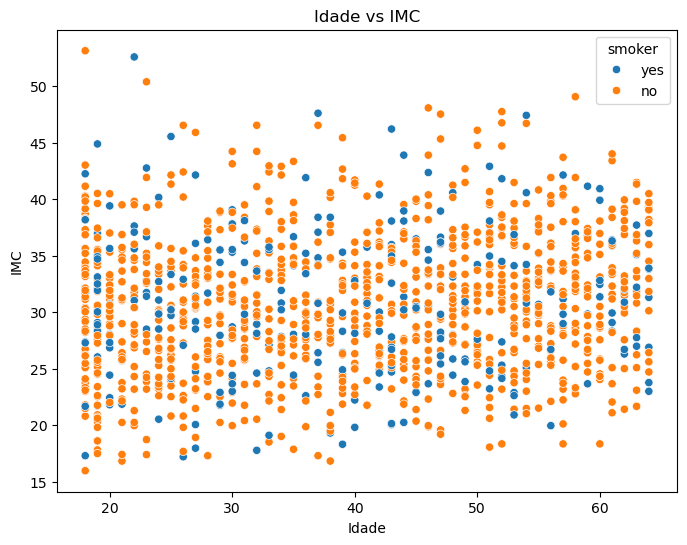

In [10]:
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(df, x='age', y='bmi',hue='smoker', ax=ax)
ax.set_title('Idade vs IMC')
ax.set_xlabel('Idade')
ax.set_ylabel('IMC')
plt.show()

## Estatísticas do IMC por Fumantes

In [11]:
print(f'Média de IMC dos fumantes: {df[df['smoker'] == 'yes']['bmi'].mean():.2f}')
print(f'Média de IMC dos não fumantes: {df[df['smoker'] == 'no']['bmi'].mean():.2f}')
print(f'Desvio padrão de IMC dos fumantes: {df[df['smoker'] == 'yes']['bmi'].std():.2f}')
print(f'Desvio padrão de IMC dos não fumantes: {df[df['smoker'] == 'no']['bmi'].std():.2f}')

Média de IMC dos fumantes: 30.71
Média de IMC dos não fumantes: 30.65
Desvio padrão de IMC dos fumantes: 6.32
Desvio padrão de IMC dos não fumantes: 6.04


## Custos Médicos por Sexo e Fumante

/tmp/ipykernel_3524/2518283250.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Feminino', 'Masculino'])


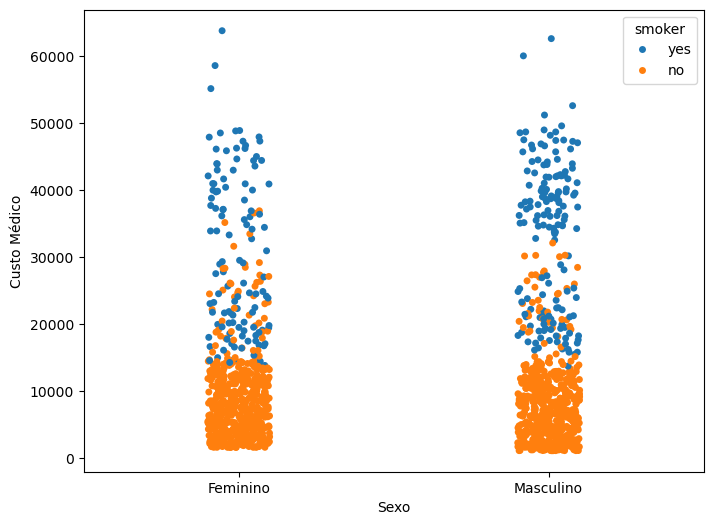

In [12]:
f, ax = plt.subplots(figsize=(8,6))
sns.stripplot(df, x="sex", y="charges", hue="smoker")
ax.set_xticklabels(['Feminino', 'Masculino'])
ax.set_ylabel('Custo Médico')
ax.set_xlabel('Sexo')
plt.show()

## Regressão Linear: Idade x Custo Médico

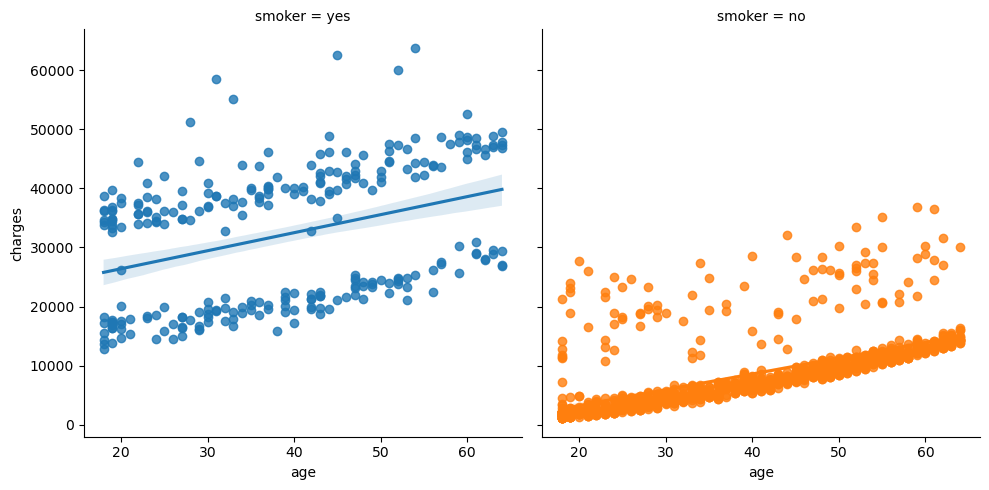

In [13]:
sns.lmplot(df, x="age", y="charges", hue='smoker' ,col='smoker')
plt.show()

## PairGrid: Exploração múltiplas variáveis

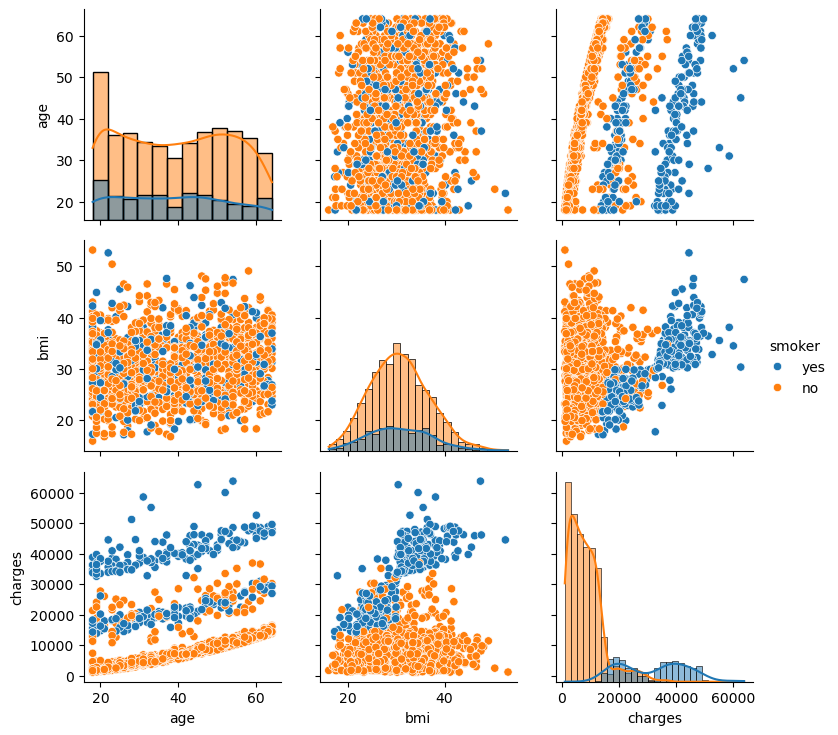

In [14]:
g = sns.PairGrid(df, hue="smoker", vars=["age","bmi","charges"])
g.map_diag(sns.histplot, kde=True)
g.map_offdiag(sns.scatterplot)
g.add_legend()

plt.show()

In [15]:
df[(df['charges'] >= 10000) & (df['charges'] <= 30000) & (df['smoker'] == 'no')]['age'].mean()

np.float64(51.99707602339181)

Média de idade dos não fumantes que tem um custo médico entre 10k e 30k.

In [16]:
df[(df['charges'] >= 10000) & (df['charges'] <= 30000) & (df['smoker'] == 'no')]['bmi'].min()

18.335

# Pré-processamento de Dados

Separando features e target

In [17]:
X = df.drop("charges", axis=1)  # Features
y = df["charges"]               # Target

## One-Hot Encoding para variáveis categóricas

In [18]:
X = pd.get_dummies(X, columns=["sex","smoker","region"], drop_first=True)

In [19]:
X

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,True,False,True,False,False
1334,18,31.920,0,False,False,False,False,False
1335,18,36.850,0,False,False,False,True,False
1336,21,25.800,0,False,False,False,False,True


## Normalização das variáveis numéricas

In [20]:
scaler = StandardScaler()
num_cols = ["age","bmi","children"]
X[num_cols] = scaler.fit_transform(X[num_cols])

In [21]:
X

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,False,True,False,False,True
1,-1.509965,0.509621,-0.078767,True,False,False,True,False
2,-0.797954,0.383307,1.580926,True,False,False,True,False
3,-0.441948,-1.305531,-0.908614,True,False,True,False,False
4,-0.513149,-0.292556,-0.908614,True,False,True,False,False
...,...,...,...,...,...,...,...,...
1333,0.768473,0.050297,1.580926,True,False,True,False,False
1334,-1.509965,0.206139,-0.908614,False,False,False,False,False
1335,-1.509965,1.014878,-0.908614,False,False,False,True,False
1336,-1.296362,-0.797813,-0.908614,False,False,False,False,True


## Divisão treino/teste

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Features depois do pré-processamento:\n", X.head())
print("\nX_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

✅ Features depois do pré-processamento:
         age       bmi  children  sex_male  smoker_yes  region_northwest  \
0 -1.438764 -0.453320 -0.908614     False        True             False   
1 -1.509965  0.509621 -0.078767      True       False             False   
2 -0.797954  0.383307  1.580926      True       False             False   
3 -0.441948 -1.305531 -0.908614      True       False              True   
4 -0.513149 -0.292556 -0.908614      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  

X_train shape: (1070, 8)
X_test shape: (268, 8)


## Modelo Random Forest

In [23]:
rf = RandomForestRegressor(
    n_estimators=100,   # número de árvores
    random_state=42
)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Avaliação do Modelo

In [24]:
y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("📊 Avaliação do Modelo Random Forest")
print(f"MAE  (Erro Absoluto Médio): {mae:.2f}")
print(f"RMSE (Raiz do Erro Quadrático Médio): {rmse:.2f}")
print(f"R²   (Coef. de Determinação): {r2:.2f}")


📊 Avaliação do Modelo Random Forest
MAE  (Erro Absoluto Médio): 2545.21
RMSE (Raiz do Erro Quadrático Médio): 4567.96
R²   (Coef. de Determinação): 0.87


## Análise dos Resíduos

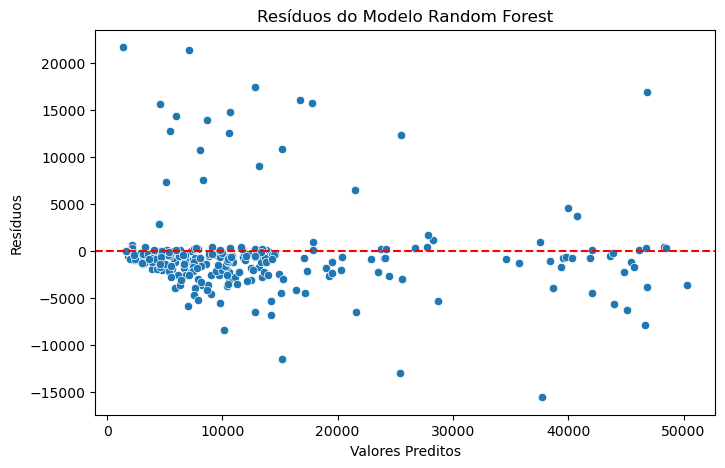

In [25]:
residuos = y_test - y_pred
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuos)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Valores Preditos")
plt.ylabel("Resíduos")
plt.title("Resíduos do Modelo Random Forest")
plt.show()

## Valores Reais vs Preditos

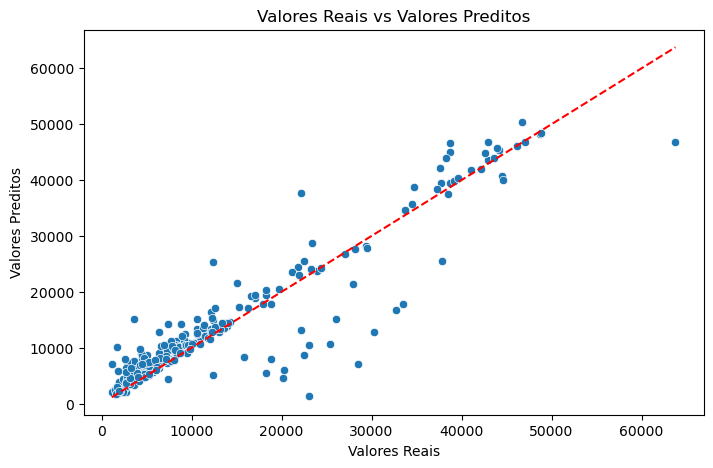

In [26]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.xlabel("Valores Reais")
plt.ylabel("Valores Preditos")
plt.title("Valores Reais vs Valores Preditos")
plt.show()

## Comparação em Linha com Pontos

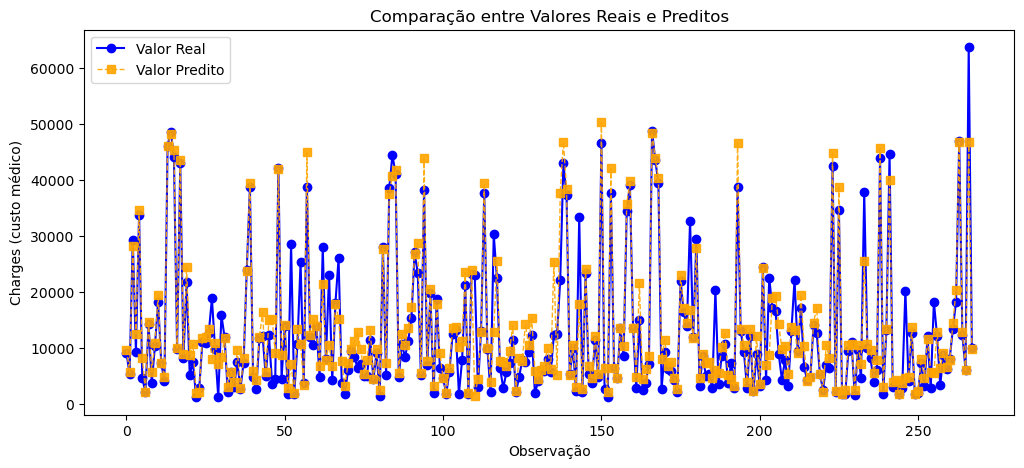

In [27]:
df_resultados = pd.DataFrame({
    "Real": y_test.values,
    "Predito": y_pred
}).reset_index(drop=True)

# Plot
plt.figure(figsize=(12,5))
plt.plot(df_resultados.index, df_resultados["Real"], marker="o", color="blue", label="Valor Real")
plt.plot(df_resultados.index, df_resultados["Predito"], marker="s", 
         color="orange", linestyle="--", linewidth=1, alpha=0.9, label="Valor Predito")
plt.xlabel("Observação")
plt.ylabel("Charges (custo médico)")
plt.title("Comparação entre Valores Reais e Preditos")
plt.legend()
plt.show()

Neste notebook, exploramos e modelamos o dataset de despesas médicas passo a passo:

Exploração de dados:

Visualizamos distribuições de idade, IMC, sexo e hábitos de fumar.

Identificamos diferenças claras entre fumantes e não fumantes nos custos médicos.

Pré-processamento:

Tratamos variáveis categóricas com One-Hot Encoding.

Padronizamos as variáveis numéricas com StandardScaler.

Dividimos os dados em conjuntos de treino e teste.

Modelagem:

Aplicamos Random Forest Regressor para prever os custos médicos.

Avaliamos o modelo com métricas como MAE, RMSE e R².

Análise de resultados:

Gráficos de resíduos e de valores reais vs preditos mostraram que o modelo captura bem a tendência geral.

Barras de erro ajudaram a identificar observações com maiores desvios, permitindo insights sobre possíveis outliers ou padrões específicos.

Insights principais:

Fumantes tendem a ter custos médicos significativamente maiores.

O IMC e a idade influenciam nos gastos, mas a relação não é totalmente linear, justificando o uso do Random Forest.

O modelo consegue capturar padrões gerais, mas pequenas diferenças ainda aparecem, indicando oportunidades para ajustes futuros ou inclusão de novas variáveis.

Próximos passos possíveis:

Testar outros modelos (Gradient Boosting, XGBoost) para comparação de performance.

Ajustar hiperparâmetros do Random Forest com GridSearchCV.

Explorar novas variáveis que possam impactar o custo médico (ex: histórico familiar, hábitos de atividade física, dieta).

Este notebook serve como um guia completo de análise exploratória, pré-processamento e modelagem de Machine Learning em datasets de saúde, mostrando como extrair insights importantes e avaliar a performance de modelos preditivos.